## 1. Cross-correlation

#### 1.1 Definiation

**Cross-correlation** is the comparison of **two different time series** to detect if there is a **correlation** between metrics with the same maximum and minimum values. For example: “Are two audio signals in phase?”

#### 1.2 Formula

$$ G[i, j] = \sum_{u=-k}^{k}\sum_{v=-k}^{k}h[u, v]\cdot F[i+u, j+v] $$

$$ k: number\ of\ negihbor $$
$$ h[u,v]: weight $$

Notice: **From left to right** and **from top to bottom**

#### 1.3 Example

![title](img/crosscorrelation.jpg)

$$ G[3,3 ] = a*A+b*B+c*C+d*D+e*E+f*F+g*G+h*H+i*I $$

In [25]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015, 2, 9)
end = datetime(2017, 5, 24)
goog = web.DataReader('F', 'morningstar', start, end)
goog.head()

Close   High    Low   Open    Volume
Symbol Date                                            
F      2015-02-09  15.92  16.03  15.72  15.76  20286720
       2015-02-10  16.09  16.14  15.91  16.05  27928530
       2015-02-11  16.25  16.31  16.01  16.08  34285331
       2015-02-12  16.36  16.45  16.30  16.34  23738806
       2015-02-13  16.30  16.36  16.19  16.33  19954568

In [26]:
goog = goog['Close']

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

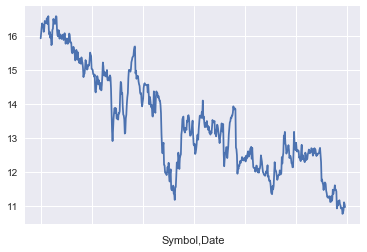

In [28]:
goog.plot();

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
d = goog

In [34]:
total = sum(d)
av = total / len(d)
z = [i - av for i in d]

In [35]:
# Now let's generate random data for the same period
d1 = np.random.random(len(d))
assert len(d) == len(d1)

In [36]:
total1 = sum(d1)
av1 = total1 / len(d1)
z1 = [i - av1 for i in d1]

In [37]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

max correlation is at lag 30


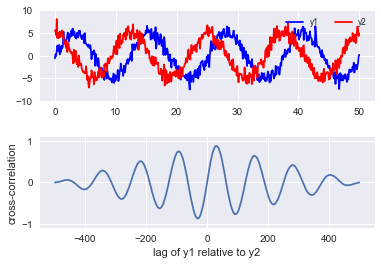

In [39]:
npts = 500
x = np.linspace(0, 50, npts)
y1 = 5 * np.sin(x/2) + np.random.randn(npts)
y2 = 5 * np.cos(x/2) + np.random.randn(npts)

lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='y1')
ax.plot(x, y2, 'r', label='y2')
ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)